## 1.  numpy, seaborn 라이브러리 로드하고 버전 확인하기


In [3]:
import numpy as np

import seaborn as sns

print("numpy ver=", np.__version__)

print("seaborn ver=", sns.__version__)

numpy ver= 1.16.5
seaborn ver= 0.9.0


#  2. data 이름 변수를 만든다. 10행, 12열 임의의 수를 만드세요.

In [8]:
data = np.random.rand(10,12)

# 3.앞에 5개의 값을 확인

In [12]:
data[:5]

array([[0.45126285, 0.7470686 , 0.13528523, 0.48085511, 0.6320621 ,
        0.01633789, 0.80865882, 0.38612857, 0.94654393, 0.21313414,
        0.64845374, 0.54159193],
       [0.52370719, 0.02255217, 0.24011688, 0.75796543, 0.738897  ,
        0.89252204, 0.97118663, 0.99413192, 0.09387499, 0.57319947,
        0.70492848, 0.09294112],
       [0.13339247, 0.83207992, 0.19204856, 0.50596252, 0.14023085,
        0.42625041, 0.91285743, 0.05570223, 0.74467128, 0.86551949,
        0.40670068, 0.19463609],
       [0.857734  , 0.62418013, 0.2255254 , 0.67627511, 0.53706086,
        0.56118467, 0.39924472, 0.71092686, 0.50875501, 0.42462479,
        0.11032705, 0.00717105],
       [0.03397906, 0.26263798, 0.73893311, 0.80605629, 0.10603924,
        0.27305308, 0.29311624, 0.12732795, 0.60695153, 0.59364683,
        0.93736203, 0.70403215]])

# 4. sns.heatmap 그리기

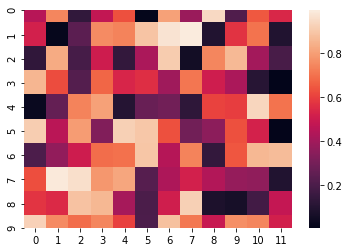

In [14]:
sns. heatmap(data)

# 데이터 셋은 flights

1. sns에서 제공되는 데이터셋 "flights" 불러와서 flights를 만든다.
  -sns.load_dataset()

In [90]:
flights =sns.load_dataset("flights")

2. 데이터 확인하기(df.head())

In [24]:
flights.head(5)

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


3. 데이터 전체 건수(행, 열 확인하기 (df.shape))

In [38]:
flights.shape

(144, 3)

4. month를 index,year를 column, 승객수 value를 잡는 df.pivot()

In [91]:
import pandas as pd

year = flights['year']

df = pd.DataFrame(flights, index=year, columns =['month', 'passengers'])

df

,month,passengers
year,,
1949,NaN,NaN
1949,NaN,NaN
1949,NaN,NaN
1949,NaN,NaN
1949,NaN,NaN
...,...,...
1960,NaN,NaN
1960,NaN,NaN
1960,NaN,NaN


In [89]:
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


In [92]:
flights = flights.pivot("month", "year", "passengers") ; flights.head(3)

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419


5. heatmap 그리기 
 * figsize = (10,8)

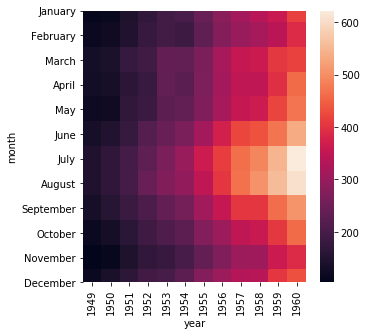

In [58]:
import matplotlib.pyplot as plt
plt. figure(figsize = (5,5))
sns.heatmap(flights)

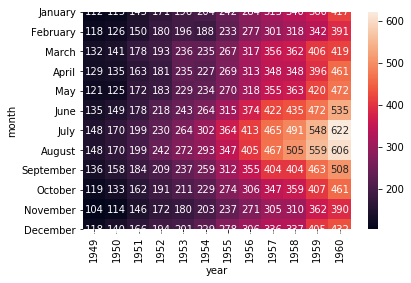

In [79]:
sns.heatmap(flights, annot=True, fmt='d') # annot 값 표시

2. 컬러를 바꾸고 싶을 때

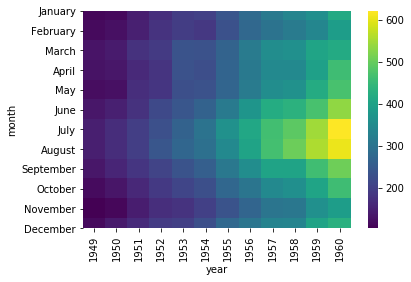

In [80]:
sns.heatmap(flights, cmap='viridis')

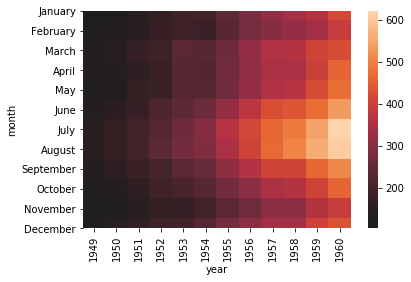

In [83]:
sns.heatmap(flights, center=flights.loc['January', 1949])

# pd.pivot

In [93]:
df = pd.DataFrame({"foo": ['one','one','one', 'two', 'two', 'two'], "bar": ['A', 'B', 'C', 'A','B','C'], "baz": ['1', '2', '3', '4', '5', '6'], "zoo": ['x','y','z','q','w','t']})

df

,foo,bar,baz,zoo
0,one,A,1,x
1,one,B,2,y
2,one,C,3,z
3,two,A,4,q
4,two,B,5,w
5,two,C,6,t


In [95]:
df.pivot(index='foo', columns='bar', values='baz')

bar,A,B,C
foo,,,
one,1,2,3
two,4,5,6


In [97]:
df.pivot(index='foo', columns='bar')['baz']

bar,A,B,C
foo,,,
one,1,2,3
two,4,5,6


In [99]:
df.pivot(index='foo', columns='bar',values=['baz', 'zoo'])

baz       zoo      
bar   A  B  C   A  B  C
foo                    
one   1  2  3   x  y  z
two   4  5  6   q  w  t

In [101]:
df.pivot_table

<bound method DataFrame.pivot_table of    foo bar baz zoo
0  one   A   1   x
1  one   B   2   y
2  one   C   3   z
3  two   A   4   q
4  two   B   5   w
5  two   C   6   t>

In [138]:
df1 = pd.DataFrame({"A": ['foo','foo','foo', 'foo', 'foo', 'bar', 'bar', 'bar', 'bar'], 
                   "B": ['one', 'one', 'one', 'two','two','one','one','two','two'], 
                    "C": ['small', 'large', 'large', 'small', 'small', 'large','small', 'small', 'large'], 
                    "D": ['1','2','2','3','3','4', '5', '6', '7'],"E": ['2','4','5','5','6','6','8','9','9']})
df1

,A,B,C,D,E
0,foo,one,small,1,2
1,foo,one,large,2,4
2,foo,one,large,2,5
3,foo,two,small,3,5
4,foo,two,small,3,6
5,bar,one,large,4,6
6,bar,one,small,5,8
7,bar,two,small,6,9
8,bar,two,large,7,9


In [139]:
pd.pivot_table(df1, values="D", index=['A','B'], columns=['C'], aggfunc=np.sum)

C       large small
A   B              
bar one     4     5
    two     7     6
foo one    22     1
    two   NaN    33

In [144]:
import numpy as np
pd.pivot_table(df1, values="D", index=['A','B'], columns=['C'], aggfunc=np.sum)

C       large small
A   B              
bar one     4     5
    two     7     6
foo one    22     1
    two   NaN    33